## Stratified K-Fold Cross Validation (OOP)

In [3]:
import os
import sys
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from src.k_fold.stratified_k_fold import KFoldModelTrainer
from src.processing import data_augmentation

In [2]:
sys.path.append('/home/bilgecan_cihan/audio-predictive-maintenance/data_science')
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [4]:
# generate LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(173, 40)))  # (X_train.shape[1], X_train.shape[2])
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               86528     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 104,330
Trainable params: 104,330
Non-trainable params: 0
_________________________________________________________________


In [5]:
# load processed data and initialize kf object
kf = KFoldModelTrainer(fold=5)

/home/bilgecan_cihan/.local/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [6]:
# investigate total samples at each fold
kf.create_kfold_data(input_RNN=True)

> Fold 1, Train: 0=798, 1=162, 2=780, 3=540, 4=644, 5=768, 6=13, 7=644, 8=718, 9=800,                  
  Fold 1, Test: 0=199, 1=41, 2=196, 3=135, 4=161, 5=193, 6=3, 7=160, 8=179, 9=200

> Fold 2, Train: 0=797, 1=162, 2=781, 3=540, 4=644, 5=769, 6=13, 7=643, 8=718, 9=800,                  
  Fold 2, Test: 0=200, 1=41, 2=195, 3=135, 4=161, 5=192, 6=3, 7=161, 8=179, 9=200

> Fold 3, Train: 0=797, 1=162, 2=781, 3=540, 4=644, 5=769, 6=13, 7=643, 8=718, 9=800,                  
  Fold 3, Test: 0=200, 1=41, 2=195, 3=135, 4=161, 5=192, 6=3, 7=161, 8=179, 9=200

> Fold 4, Train: 0=798, 1=163, 2=781, 3=540, 4=644, 5=769, 6=12, 7=643, 8=717, 9=800,                  
  Fold 4, Test: 0=199, 1=40, 2=195, 3=135, 4=161, 5=192, 6=4, 7=161, 8=180, 9=200

> Fold 5, Train: 0=798, 1=163, 2=781, 3=540, 4=644, 5=769, 6=13, 7=643, 8=717, 9=800,                  
  Fold 5, Test: 0=199, 1=40, 2=195, 3=135, 4=161, 5=192, 6=3, 7=161, 8=180, 9=200



In [7]:
# generate a dictionary with all folds and compile
kf.initialize_model(model)

In [8]:
# start training
kf.train_models(input_RNN=True,
                batch_size=256,
                epochs=1000,
                patience=50,
                early_stop=True,
                data_augmentation_function=data_augmentation.apply_noise_batch)

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/1000
46/46 [==============================] - 1s 29ms/step - loss: 1.9276 - accuracy: 0.2925 - val_loss: 1.5213 - val_accuracy: 0.5140
Epoch 2/1000
46/46 [==============================] - 1s 22ms/step - loss: 1.4275 - accuracy: 0.4936 - val_loss: 1.1760 - val_accuracy: 0.6210
Epoch 3/1000
46/46 [==============================] - 1s 22ms/step - loss: 1.1750 - accuracy: 0.5964 - val_loss: 0.9868 - val_accuracy: 0.6762
Epoch 4/1000
46/46 [==============================] - 1s 22ms/step - loss: 1.0012 - accuracy: 0.6606 - val_loss: 0.8521 - val_accuracy: 0.7246
Epoch 5/1000
46/46 [==============================] - 1s 21ms/step - loss: 0.8625 - accuracy: 0.7058 - val_loss: 0.7565 - val_accuracy: 0.7430
Epoch 6/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.7434 - accuracy: 0.7509 - val_loss: 0.6851 - val_accuracy: 0.7785
Epoch 7/1000
46/46 [=========================

46/46 [==============================] - 1s 22ms/step - loss: 0.0759 - accuracy: 0.9758 - val_loss: 0.4258 - val_accuracy: 0.8889
Epoch 58/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0794 - accuracy: 0.9732 - val_loss: 0.4678 - val_accuracy: 0.8698
Epoch 59/1000
46/46 [==============================] - 1s 21ms/step - loss: 0.0783 - accuracy: 0.9719 - val_loss: 0.4038 - val_accuracy: 0.8923
Epoch 60/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0667 - accuracy: 0.9766 - val_loss: 0.4700 - val_accuracy: 0.8800
Epoch 61/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0744 - accuracy: 0.9754 - val_loss: 0.4601 - val_accuracy: 0.8848
Epoch 62/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0664 - accuracy: 0.9768 - val_loss: 0.4361 - val_accuracy: 0.8909
Epoch 63/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0735 - accuracy: 0.9746 - val_loss: 0.4918 - val_accuracy: 0.8834
Epoch 

Epoch 114/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0342 - accuracy: 0.9887 - val_loss: 0.5327 - val_accuracy: 0.8903
Epoch 115/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0284 - accuracy: 0.9909 - val_loss: 0.5209 - val_accuracy: 0.8875
Epoch 116/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0404 - accuracy: 0.9878 - val_loss: 0.5308 - val_accuracy: 0.8909
Epoch 117/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0572 - accuracy: 0.9806 - val_loss: 0.5802 - val_accuracy: 0.8943
Epoch 118/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0493 - accuracy: 0.9838 - val_loss: 0.4574 - val_accuracy: 0.8950
Epoch 119/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0381 - accuracy: 0.9878 - val_loss: 0.5066 - val_accuracy: 0.8964
Epoch 120/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0330 - accuracy: 0.9894 - val_loss: 0.4793 - val_ac

46/46 [==============================] - 1s 23ms/step - loss: 0.1310 - accuracy: 0.9530 - val_loss: 0.4951 - val_accuracy: 0.8569
Epoch 32/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.1254 - accuracy: 0.9554 - val_loss: 0.4830 - val_accuracy: 0.8609
Epoch 33/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1255 - accuracy: 0.9568 - val_loss: 0.5253 - val_accuracy: 0.8534
Epoch 34/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.1217 - accuracy: 0.9552 - val_loss: 0.5068 - val_accuracy: 0.8569
Epoch 35/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.1143 - accuracy: 0.9606 - val_loss: 0.5533 - val_accuracy: 0.8562
Epoch 36/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.1260 - accuracy: 0.9575 - val_loss: 0.5429 - val_accuracy: 0.8541
Epoch 37/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.1256 - accuracy: 0.9546 - val_loss: 0.5348 - val_accuracy: 0.8575
Epoch 

Epoch 88/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0500 - accuracy: 0.9841 - val_loss: 0.5951 - val_accuracy: 0.8800
Epoch 89/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0410 - accuracy: 0.9855 - val_loss: 0.5804 - val_accuracy: 0.8678
Epoch 90/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0408 - accuracy: 0.9862 - val_loss: 0.6495 - val_accuracy: 0.8650
Epoch 91/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0640 - accuracy: 0.9787 - val_loss: 0.6376 - val_accuracy: 0.8643
Epoch 92/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0604 - accuracy: 0.9795 - val_loss: 0.6073 - val_accuracy: 0.8678
Epoch 93/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0497 - accuracy: 0.9838 - val_loss: 0.6099 - val_accuracy: 0.8637
Epoch 94/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0435 - accuracy: 0.9858 - val_loss: 0.6104 - val_accuracy:

46/46 [==============================] - 1s 22ms/step - loss: 0.0286 - accuracy: 0.9902 - val_loss: 0.6637 - val_accuracy: 0.8698
Epoch 145/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0317 - accuracy: 0.9887 - val_loss: 0.6880 - val_accuracy: 0.8684
Epoch 146/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0525 - accuracy: 0.9836 - val_loss: 0.6637 - val_accuracy: 0.8739
Epoch 147/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0397 - accuracy: 0.9858 - val_loss: 0.6367 - val_accuracy: 0.8739
Epoch 148/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0340 - accuracy: 0.9884 - val_loss: 0.6526 - val_accuracy: 0.8718
Epoch 149/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0316 - accuracy: 0.9898 - val_loss: 0.6602 - val_accuracy: 0.8753
Epoch 150/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0345 - accuracy: 0.9881 - val_loss: 0.6762 - val_accuracy: 0.8766


Epoch 45/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0894 - accuracy: 0.9689 - val_loss: 0.5578 - val_accuracy: 0.8528
Epoch 46/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0893 - accuracy: 0.9699 - val_loss: 0.5447 - val_accuracy: 0.8548
Epoch 47/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0832 - accuracy: 0.9726 - val_loss: 0.5662 - val_accuracy: 0.8521
Epoch 48/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0757 - accuracy: 0.9753 - val_loss: 0.5703 - val_accuracy: 0.8541
Epoch 49/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0846 - accuracy: 0.9714 - val_loss: 0.5409 - val_accuracy: 0.8480
Epoch 50/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0836 - accuracy: 0.9709 - val_loss: 0.5354 - val_accuracy: 0.8596
Epoch 51/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0753 - accuracy: 0.9736 - val_loss: 0.5579 - val_accuracy:

Epoch 102/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0290 - accuracy: 0.9902 - val_loss: 0.5730 - val_accuracy: 0.8793
Epoch 103/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0293 - accuracy: 0.9907 - val_loss: 0.6667 - val_accuracy: 0.8698
Epoch 104/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0382 - accuracy: 0.9881 - val_loss: 0.5684 - val_accuracy: 0.8773
Epoch 105/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0416 - accuracy: 0.9869 - val_loss: 0.7362 - val_accuracy: 0.8643
Epoch 106/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0421 - accuracy: 0.9854 - val_loss: 0.6170 - val_accuracy: 0.8753
Epoch 107/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0273 - accuracy: 0.9912 - val_loss: 0.6629 - val_accuracy: 0.8691
Epoch 108/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0283 - accuracy: 0.9902 - val_loss: 0.6063 - val_ac

46/46 [==============================] - 1s 22ms/step - loss: 0.0242 - accuracy: 0.9919 - val_loss: 0.6793 - val_accuracy: 0.8759
Epoch 159/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0237 - accuracy: 0.9927 - val_loss: 0.7167 - val_accuracy: 0.8759
Epoch 160/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0189 - accuracy: 0.9941 - val_loss: 0.7179 - val_accuracy: 0.8780
Epoch 161/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0231 - accuracy: 0.9920 - val_loss: 0.7596 - val_accuracy: 0.8657
Epoch 00161: early stopping
46/46 [==============================] - 0s 8ms/step - loss: 0.7596 - accuracy: 0.8657
Testing scores for fold 3:                 loss of 0.7595696449279785;                 accuracy of 86.57123446464539%
Training completed in time:  0:02:51.384360
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/1000
46/46 [==============================] - 1s 29ms

Epoch 51/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0783 - accuracy: 0.9723 - val_loss: 0.5169 - val_accuracy: 0.8800
Epoch 52/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0752 - accuracy: 0.9743 - val_loss: 0.5567 - val_accuracy: 0.8814
Epoch 53/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0777 - accuracy: 0.9730 - val_loss: 0.5258 - val_accuracy: 0.8855
Epoch 54/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0783 - accuracy: 0.9732 - val_loss: 0.5107 - val_accuracy: 0.8882
Epoch 55/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0691 - accuracy: 0.9755 - val_loss: 0.5422 - val_accuracy: 0.8855
Epoch 56/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0695 - accuracy: 0.9770 - val_loss: 0.5572 - val_accuracy: 0.8923
Epoch 57/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0732 - accuracy: 0.9755 - val_loss: 0.5115 - val_accuracy:

Epoch 108/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0381 - accuracy: 0.9864 - val_loss: 0.6682 - val_accuracy: 0.8882
Epoch 109/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0494 - accuracy: 0.9840 - val_loss: 0.6798 - val_accuracy: 0.8834
Epoch 110/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0466 - accuracy: 0.9840 - val_loss: 0.6819 - val_accuracy: 0.8862
Epoch 111/1000
46/46 [==============================] - 1s 21ms/step - loss: 0.0446 - accuracy: 0.9846 - val_loss: 0.6360 - val_accuracy: 0.8896
Epoch 112/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0560 - accuracy: 0.9822 - val_loss: 0.6565 - val_accuracy: 0.8759
Epoch 113/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0386 - accuracy: 0.9870 - val_loss: 0.6904 - val_accuracy: 0.8759
Epoch 114/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0368 - accuracy: 0.9883 - val_loss: 0.6130 - val_ac

46/46 [==============================] - 1s 22ms/step - loss: 0.0270 - accuracy: 0.9908 - val_loss: 0.6888 - val_accuracy: 0.8923
Epoch 165/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0221 - accuracy: 0.9920 - val_loss: 0.6580 - val_accuracy: 0.9005
Epoch 166/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0267 - accuracy: 0.9918 - val_loss: 0.6812 - val_accuracy: 0.8875
Epoch 167/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0262 - accuracy: 0.9917 - val_loss: 0.6484 - val_accuracy: 0.8916
Epoch 168/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0406 - accuracy: 0.9866 - val_loss: 0.6633 - val_accuracy: 0.8896
Epoch 169/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0398 - accuracy: 0.9875 - val_loss: 0.6093 - val_accuracy: 0.8971
Epoch 170/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0350 - accuracy: 0.9888 - val_loss: 0.6513 - val_accuracy: 0.8821


46/46 [==============================] - 1s 22ms/step - loss: 0.2890 - accuracy: 0.9006 - val_loss: 0.4893 - val_accuracy: 0.8431
Epoch 18/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.2672 - accuracy: 0.9060 - val_loss: 0.4725 - val_accuracy: 0.8411
Epoch 19/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.2693 - accuracy: 0.9068 - val_loss: 0.4730 - val_accuracy: 0.8520
Epoch 20/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.2668 - accuracy: 0.9078 - val_loss: 0.4677 - val_accuracy: 0.8472
Epoch 21/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.2511 - accuracy: 0.9122 - val_loss: 0.4390 - val_accuracy: 0.8554
Epoch 22/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.2235 - accuracy: 0.9237 - val_loss: 0.4529 - val_accuracy: 0.8568
Epoch 23/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.2122 - accuracy: 0.9254 - val_loss: 0.4625 - val_accuracy: 0.8581
Epoch 

Epoch 74/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0720 - accuracy: 0.9751 - val_loss: 0.6119 - val_accuracy: 0.8745
Epoch 75/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0697 - accuracy: 0.9755 - val_loss: 0.5643 - val_accuracy: 0.8697
Epoch 76/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0539 - accuracy: 0.9819 - val_loss: 0.5301 - val_accuracy: 0.8786
Epoch 77/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0505 - accuracy: 0.9839 - val_loss: 0.5539 - val_accuracy: 0.8840
Epoch 78/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0482 - accuracy: 0.9844 - val_loss: 0.5378 - val_accuracy: 0.8854
Epoch 79/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0558 - accuracy: 0.9817 - val_loss: 0.5378 - val_accuracy: 0.8868
Epoch 80/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0583 - accuracy: 0.9788 - val_loss: 0.5654 - val_accuracy:

Epoch 131/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0312 - accuracy: 0.9899 - val_loss: 0.5307 - val_accuracy: 0.8854
Epoch 132/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0239 - accuracy: 0.9920 - val_loss: 0.6069 - val_accuracy: 0.8861
Epoch 133/1000
46/46 [==============================] - 1s 23ms/step - loss: 0.0303 - accuracy: 0.9892 - val_loss: 0.5473 - val_accuracy: 0.8929
Epoch 134/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0408 - accuracy: 0.9863 - val_loss: 0.6221 - val_accuracy: 0.8834
Epoch 135/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0321 - accuracy: 0.9891 - val_loss: 0.5934 - val_accuracy: 0.8820
Epoch 136/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0351 - accuracy: 0.9882 - val_loss: 0.5189 - val_accuracy: 0.8861
Epoch 137/1000
46/46 [==============================] - 1s 22ms/step - loss: 0.0391 - accuracy: 0.9871 - val_loss: 0.5901 - val_ac

In [9]:
# evaluate
kf.post_train_eval()

------------------------------------------------------------------------
Score per fold

> Fold 1 - Loss: 0.0060                 - Training Accuracy: 99.8807 %
> Fold 1 - Loss: 0.4922                 - Testing Accuracy: 89.0252 %

> Fold 2 - Loss: 0.0024                 - Training Accuracy: 99.9403 %
> Fold 2 - Loss: 0.6382                 - Testing Accuracy: 87.1166 %

> Fold 3 - Loss: 0.0075                 - Training Accuracy: 99.7699 %
> Fold 3 - Loss: 0.7596                 - Testing Accuracy: 86.5712 %

> Fold 4 - Loss: 0.0083                 - Training Accuracy: 99.7699 %
> Fold 4 - Loss: 0.7308                 - Testing Accuracy: 89.0252 %

> Fold 5 - Loss: 0.0028                 - Training Accuracy: 99.9489 %
> Fold 5 - Loss: 0.5623                 - Testing Accuracy: 89.1542 %

------------------------------------------------------------------------
Average scores for all folds:

> Training Accuracy: 99.8619 %             (+- 0.0787)
> Testing Accuracy: 88.1785 %             

 Plots for Model 1


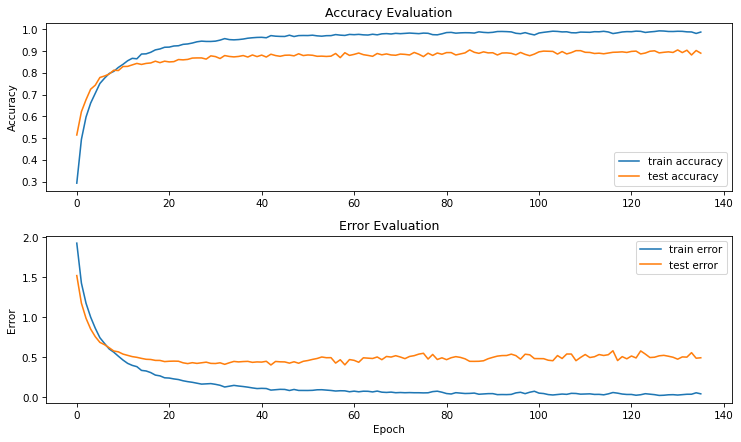

 Plots for Model 2


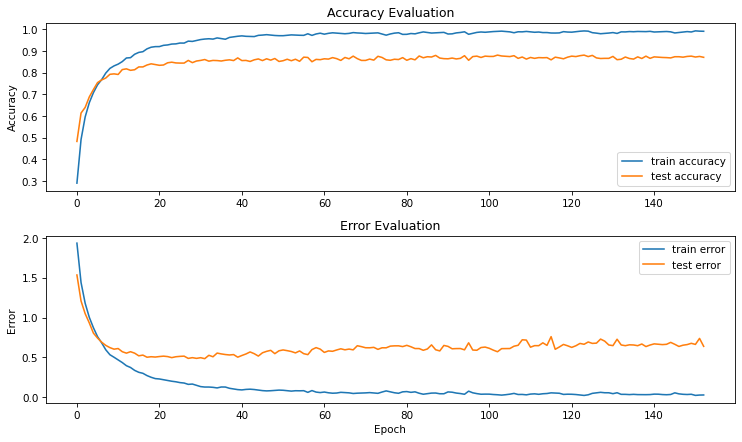

 Plots for Model 3


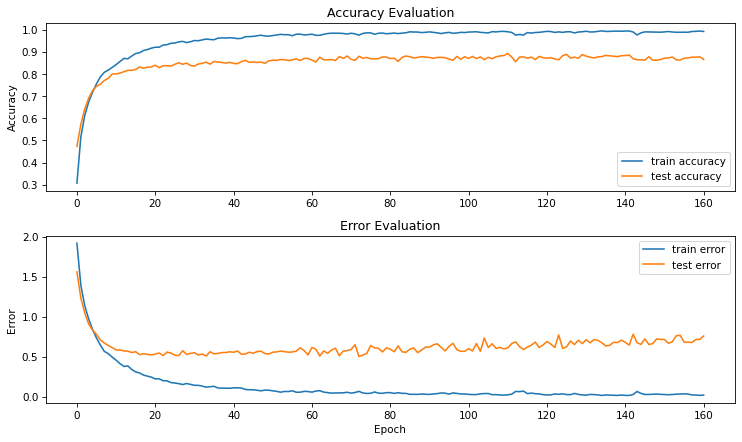

 Plots for Model 4


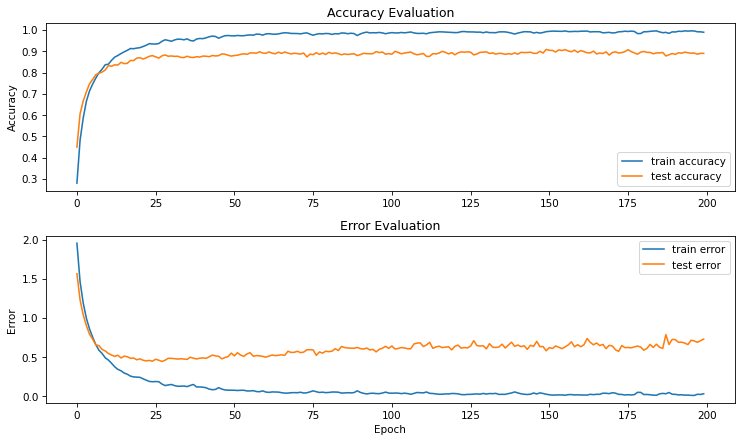

 Plots for Model 5


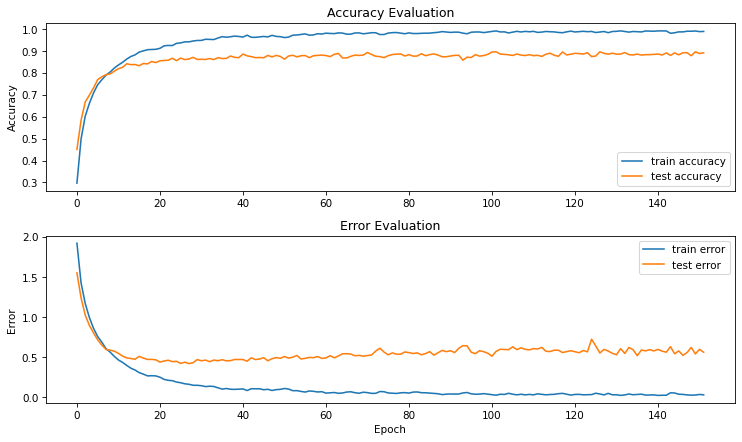

In [10]:
# plot accuracies and errors
kf.plot_histories()

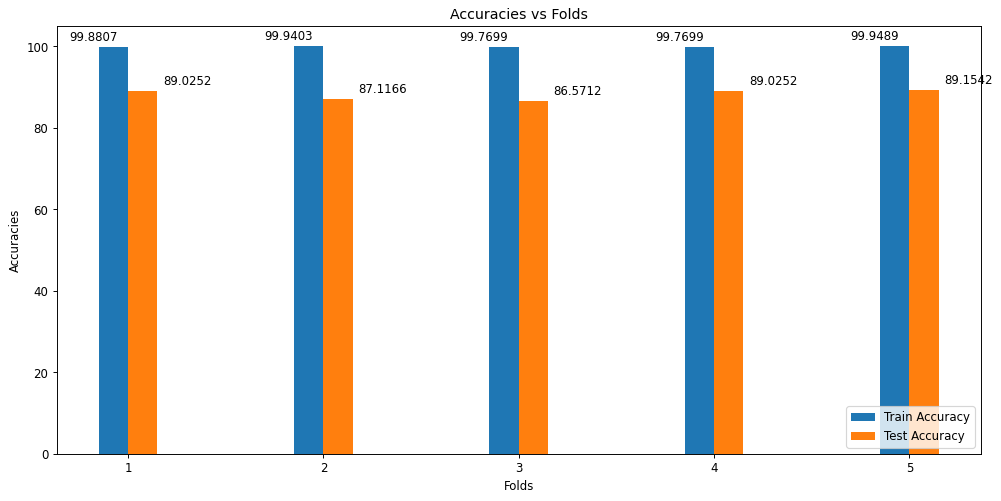

In [11]:
# accuracies of each fold
kf.plot_accuracies_vs_folds()

* Models are already saved, skip below.

In [ ]:
# save all folds (default path is for lstm)
kf.save_all_models(path="data_science/models/lstm_k_fold/saved_model_")

In [ ]:
# save best fold (here, fold 1)
kf.save_best_model(best_fold=1, path="data_science/models/lstm_k_fold/best_model")